In [2]:
# Configure Autoreload
%load_ext autoreload
%autoreload 2

# Add parent directory to system path
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import graph.graph_db as graph_db
import pandas as pd
import seaborn as sns
import os
import sys


In [3]:
with graph_db.GraphDB('../data/graph.db') as db:
    df = db.as_dataframe()

In [7]:
df.columns

Index(['graph_id', 'experiment_name', 'description', 'graph_aspl', 'n', 'm',
       'name', 'graph_class', 'generation_method', 'generation_parameters',
       'problem_id', 'k', 'degree_s', 'generation_method', 'solution_aspl',
       'run_time', 'is_optimal', 'solution_method', 'solver_parameters',
       'iterations', 'is_optimal', 'termination_reason',
       'generation_parameters_n', 'generation_parameters_k',
       'generation_parameters_p', 'generation_parameters_m',
       'generation_parameters_d', 'solver_parameters_verbose',
       'solver_parameters_maximum_iterations',
       'solver_parameters_maximum_time', 'solver_parameters_patience',
       'solver_parameters_min_delta', 'solver_parameters_repititions',
       'solver_parameters_aspl_lower_bound', 'solver_parameters_method_name',
       'solver_parameters_early_stopping', 'solver_parameters_population_size',
       'solver_parameters_gene_mutation_rate',
       'solver_parameters_creature_mutation_rate',
       'sol

In [40]:
df['iterations_equiv'] = df.solver_parameters_population_size.fillna(1) * df.iterations + 1
df['iterations/s'] = df['iterations_equiv'] / df.run_time
df['s/iterations'] = df.run_time / df['iterations_equiv']

In [30]:
df[['n', 'solution_method', 'iterations', 'iterations/s', 'run_time','solver_parameters_population_size', 'iterations_equiv']]

,n,solution_method,iterations,iterations/s,run_time,solver_parameters_population_size,iterations_equiv
0,50,Greedy Solver,5,297.218930,0.020187,NaN,6.0
1,50,Monte Carlo Solver,99999,17533.745206,5.703288,NaN,100000.0
2,54,Exhaustive Solver,1313399,30949.092264,42.437432,NaN,1313400.0
3,54,Exhaustive Solver,1313399,30949.092264,42.437432,NaN,1313400.0
4,54,Genetic Solver,29,20964.291433,0.691700,500.0,14501.0
...,...,...,...,...,...,...,...
2841,116,Greedy Solver,7,59.743878,0.133905,NaN,8.0
2842,116,Simulated Annealing Solver,36446,2022.780798,18.018265,NaN,36447.0
2843,50,Greedy Solver,5,248.396790,0.024155,NaN,6.0
2844,50,Greedy Solver,5,446.305425,0.013444,NaN,6.0


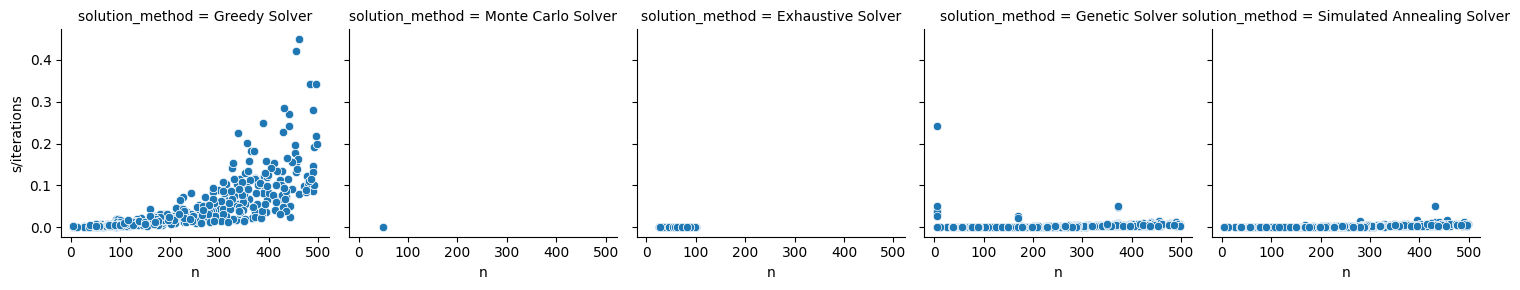

In [41]:
sns.FacetGrid(data=df, col='solution_method').map(sns.scatterplot, 'n', 's/iterations')

<Axes: xlabel='iterations/s', ylabel='Density'>

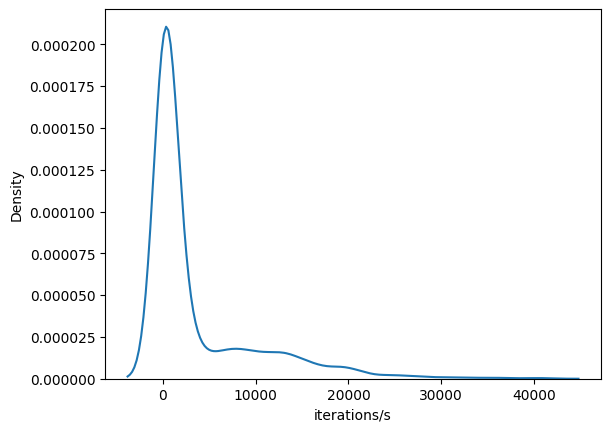

In [35]:
sns.kdeplot(data=df, x='iterations/s')